<a href="https://colab.research.google.com/github/kkamboj25/ANN-model-using-Churn-Modelling-dataset/blob/main/Churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
##Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
x=x.drop(['Geography','Gender'] ,axis=1)

In [ ]:
x=pd.concat([x,geography,gender], axis=1)

In [ ]:

#Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
 x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
 #x_train.shape
 

In [ ]:
##feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test) ## to aviod data leakage

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
## Create the ANN
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#Initialize the ANN
classifier=Sequential()


In [ ]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
##adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
##adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [ ]:
##Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)


In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping) 

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3617 - accuracy: 0.8509 - val_loss: 0.3673 - val_accuracy: 0.8463
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8584 - val_loss: 0.3596 - val_accuracy: 0.8508
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3458 - accuracy: 0.8591 - val_loss: 0.3629 - val_accuracy: 0.8538
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8593 - val_loss: 0.3583 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8556 - val_loss: 0.3621 - val_accuracy: 0.8546
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.8580 - val_loss: 0.3561 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3398 - accuracy: 0.8584 - val_loss: 0.3601 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

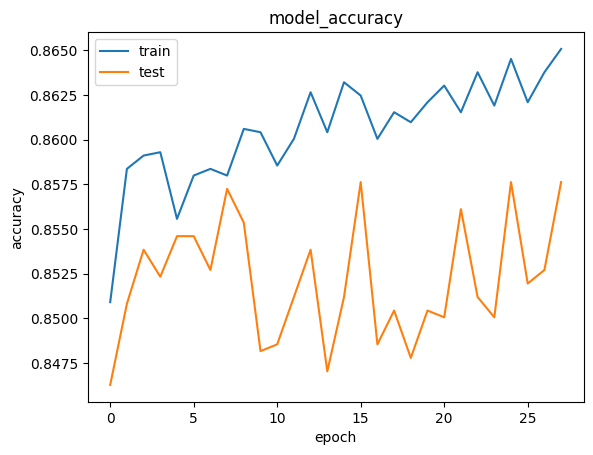

In [ ]:
##summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



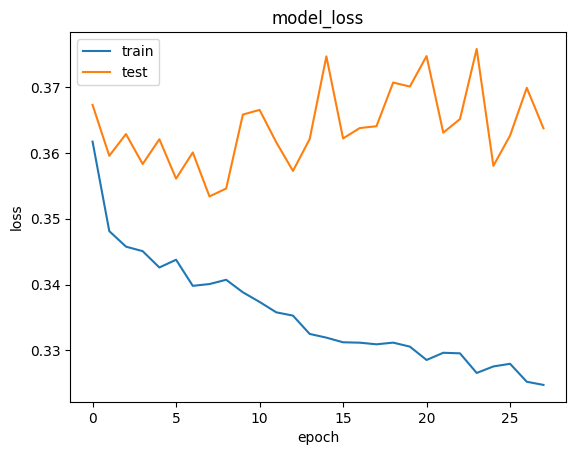

In [ ]:
##summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [ ]:
##Making the predictions and evaluating the model

##Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
##Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1529,   66],
       [ 206,  199]])

In [ ]:
##Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.864

In [ ]:
##get the weights
classifier.get_weights()

[array([[-0.39938873, -0.10534853, -1.2352636 ,  0.5834568 , -0.6163604 ,
          0.20727305, -0.19265243,  0.85727745,  0.45835167, -0.07979587,
          0.1274563 ],
        [ 1.4072672 ,  2.216473  , -0.8774844 , -1.2180225 ,  0.08111466,
          0.35833666, -2.5277755 , -0.9607269 , -1.6282749 ,  1.9674717 ,
         -0.40214288],
        [-0.14549094,  0.05230688,  0.4170606 , -0.02908833,  0.4465747 ,
         -0.75956607, -0.12564623,  1.7150468 ,  0.37868533, -0.540783  ,
          0.94170845],
        [-1.814875  , -0.12071923, -0.60498685, -0.69945085,  0.6839285 ,
          2.145232  ,  0.00560893, -0.9529244 , -1.4999605 ,  1.3836572 ,
         -1.742277  ],
        [-3.5398068 ,  0.27951238,  0.5655863 , -0.29459026,  1.5561386 ,
          2.7412448 , -1.2180495 , -1.1277506 , -0.14216197,  0.90385365,
          2.9648533 ],
        [-0.12876439, -0.12450764,  1.1446958 ,  0.09872358,  0.15061781,
          0.06794298,  0.2446593 ,  0.5015413 , -0.89860857, -0.314629 